**Proyek: Analisis Data Gaji Karyawan**

**Skenario:**
**Anda adalah seorang analis data di sebuah perusahaan teknologi. Departemen SDM ingin tahu apakah ada perbedaan signifikan dalam gaji tahunan rata-rata (annual_salary) di antara tiga departemen utama: 'Engineering', 'Marketing', dan 'Sales'. Mereka telah memberi Anda dataset berisi informasi karyawan.**

**Tujuan:**
**Gunakan pengetahuan Anda tentang pengujian hipotesis untuk menganalisis data dan memberikan jawaban berbasis bukti kepada departemen SDM.**

---

In [1]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

salary_df = pd.read_csv('gaji_karyawan.csv')
salary_df.head()

,department,annual_salary
0,Engineering,115636
1,Sales,109883
2,Marketing,104891
3,Engineering,124376
4,Marketing,89569


**TASK**


**1. Eksplorasi Data Awal (EDA):**
- Hitung statistik deskriptif (rata-rata, standar deviasi, jumlah) gaji untuk setiap departemen. Gunakan groupby() dan agg().
- Buat visualisasi untuk membandingkan distribusi gaji di ketiga departemen. Box plot adalah pilihan yang sangat baik untuk ini.

    department           mean           std  count
0  Engineering  122024.700000  18369.982359     40
1    Marketing  106007.285714  11042.173108     28
2        Sales   99146.193548  20801.971694     31


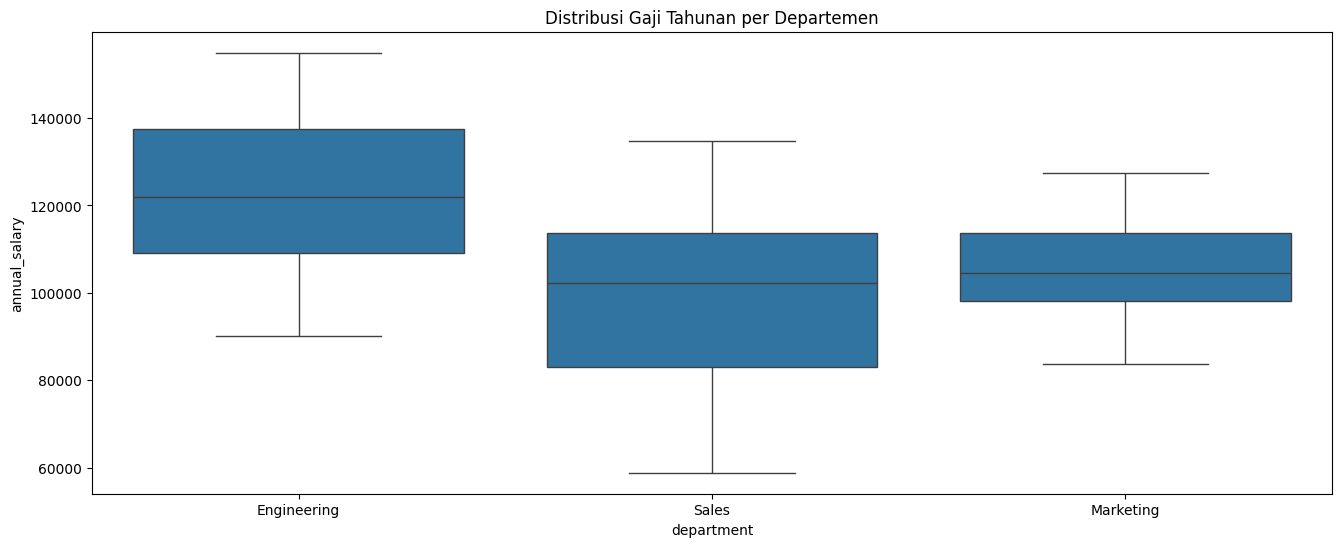

In [2]:
# Calculate descriptive statistics -> mean, std
salary_stats_desc = salary_df.groupby('department')['annual_salary'].agg(['mean', 'std', 'count']).reset_index()
print(salary_stats_desc)

plt.figure(figsize=(16, 6))
sns.boxplot(x='department', y='annual_salary', data=salary_df)
plt.title('Distribusi Gaji Tahunan per Departemen')
plt.show()

**Pertanyaan adalah:**
- Apakah rata-rata gaji di ketiga departemen tersebut sama atau berbeda secara signifikan?

----

**2. Formulasikan Hipotesis:**
- Hipotesis Nol (H₀): Tidak ada perbedaan rata-rata gaji antar departemen.
- Hipotesis Alternatif (H₁): Ada setidaknya satu departemen yang memiliki rata-rata gaji berbeda secara signifikan.

---
**3. Lakukan Uji Statistik yang Tepat:**
- Berdasarkan jumlah grup yang Anda bandingkan, pilih uji statistik yang paling sesuai (Uji T atau ANOVA).
- Gunakan library pingouin di Python untuk melakukan analisis. Jalankan pingouin.anova() pada data Anda.

In [4]:
alpha = 0.05

pg.anova(data=salary_df, 
         dv="annual_salary", 
         between="department")


,Source,ddof1,ddof2,F,p-unc,np2
0,department,2,96,16.097404,9.359192e-07,0.25114


- e-07 geser koma ke kiri 7 kalo 0.00000093

---
**4. Interpretasikan Hasil:**

- Berdasarkan hasil analisis ANOVA satu arah, diperoleh nilai F = 16.10 dan p-value = 9.36 × 10⁻⁷, yang lebih kecil dari tingkat signifikansi α = 0.05.
Dengan demikian, hipotesis nol (H₀) ditolak, dan hipotesis alternatif (H₁) diterima.

- Makna keputusan ini adalah: terdapat perbedaan yang signifikan secara statistik pada rata-rata gaji tahunan (annual_salary) di antara tiga departemen, yaitu Engineering, Marketing, dan Sales.
Hal ini menunjukkan bahwa departemen tempat seseorang bekerja berpengaruh terhadap besarnya gaji tahunan yang diterima.

---

**5. (Bonus) Lakukan Uji Lanjutan:**

- Jika hasil ANOVA Anda signifikan, jalankan pingouin.pairwise_tests() untuk melihat departemen mana yang secara spesifik berbeda satu sama lain.
- Gunakan padjust='bonf' untuk menerapkan koreksi Bonferroni dan interpretasikan p-value yang telah disesuaikan.

---
**6. Tulis Kesimpulan:**
- Buat ringkasan singkat (1-3 kalimat) dari temuan Anda. Berikan rekomendasi atau jawaban yang jelas kepada departemen SDM berdasarkan analisis data Anda.

# coba 